# Exercise 4: Calculate cumulative precipitation time series.

### Join (Merge) the Time Series Columns

In [6]:
#path of the main directory to retrieve files
main_directory = "../data/generated/DWD/hourly/precipitation/historical/"

#File that has the required data
local_prec_ts_file = "Ex_4_prec_ts_merged_2017.csv"

#Location of the required time series CSV file - hourly precipitation data
local_prec_ts_path = main_directory + local_prec_ts_file

#Location of the modified file with daily precipitation data
local_prec_ts_modified_path = main_directory + "Ex_4_precs_ts_modified_2017.csv"

In [7]:
#Converting csv to dataframe

import pandas as pd
import datetime

def prec_ts_csv_to_df(filepath):
    
    df = pd.read_csv(filepath, delimiter=";", encoding="utf8", index_col="time", parse_dates = ["time"], na_values = [-999.0, -999])

    return df

#dataframe derived from the CSV file
df_from_csv = pd.DataFrame() 

In [8]:
df_from_csv = prec_ts_csv_to_df(local_prec_ts_path)

df_from_csv

,216,1300,2483,2947,3215,4488,5468,6264,7330
time,,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.4,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2017-12-31 20:00:00,0.7,0.7,0.2,0.3,0.0,0.4,0.0,0.0,0.2
2017-12-31 21:00:00,0.1,0.9,1.3,0.3,1.2,0.5,0.0,0.0,0.2


In [9]:
df_from_csv.dtypes

216     float64
1300    float64
2483    float64
2947    float64
3215    float64
4488    float64
5468    float64
6264    float64
7330    float64
dtype: object

In [10]:
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   216     8760 non-null   float64
 1   1300    8755 non-null   float64
 2   2483    8735 non-null   float64
 3   2947    8627 non-null   float64
 4   3215    8760 non-null   float64
 5   4488    8748 non-null   float64
 6   5468    8759 non-null   float64
 7   6264    8760 non-null   float64
 8   7330    8731 non-null   float64
dtypes: float64(9)
memory usage: 684.4 KB


In [26]:
#df_from_csv.index

In [12]:
#Filtering using start date of required data frame
start_date = pd.to_datetime("2017-04-16 00:00:00") 

df_updated = df_from_csv[df_from_csv.index >= start_date]
df_updated

,216,1300,2483,2947,3215,4488,5468,6264,7330
time,,,,,,,,,
2017-04-16 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-16 01:00:00,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2017-04-16 02:00:00,0.1,0.1,0.0,0.5,0.0,0.0,0.2,0.0,0.0
2017-04-16 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-16 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.4,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2017-12-31 20:00:00,0.7,0.7,0.2,0.3,0.0,0.4,0.0,0.0,0.2
2017-12-31 21:00:00,0.1,0.9,1.3,0.3,1.2,0.5,0.0,0.0,0.2


In [13]:
#Filtering using end date of required data frame
end_date = pd.to_datetime("2017-08-16 23:00:00") 
df_updated = df_updated[df_updated.index <= end_date]

# Data frame with required date range from 2017-04-16 to 2017-08-16
df_updated 

,216,1300,2483,2947,3215,4488,5468,6264,7330
time,,,,,,,,,
2017-04-16 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-16 01:00:00,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2017-04-16 02:00:00,0.1,0.1,0.0,0.5,0.0,0.0,0.2,0.0,0.0
2017-04-16 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-16 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-08-16 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# modified dataframe that can be used for group_by function
df_modified = pd.DataFrame() 
df_modified = df_updated

#added a separate date column so it can be used for group by function
df_modified['date'] = df_updated.index.normalize() 
df_modified

<ipython-input-14-f0ab3283b48e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified['date'] = df_updated.index.normalize()


,216,1300,2483,2947,3215,4488,5468,6264,7330,date
time,,,,,,,,,,
2017-04-16 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-04-16
2017-04-16 01:00:00,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,2017-04-16
2017-04-16 02:00:00,0.1,0.1,0.0,0.5,0.0,0.0,0.2,0.0,0.0,2017-04-16
2017-04-16 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-04-16
2017-04-16 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,2017-04-16
...,...,...,...,...,...,...,...,...,...,...
2017-08-16 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-16
2017-08-16 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-16
2017-08-16 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-16


In [15]:
#final data frame that can be used for plotting
df_final =  pd.DataFrame() 

#Getting a csv with total daily precipitation rate
df_final = df_modified.groupby(['date']).sum()

df_final

,216,1300,2483,2947,3215,4488,5468,6264,7330
date,,,,,,,,,
2017-04-16,4.3,3.3,4.4,4.7,1.7,2.1,7.7,1.8,2.0
2017-04-17,14.6,9.3,13.6,12.0,7.6,9.6,14.3,8.3,6.4
2017-04-18,2.6,4.1,5.3,4.1,4.1,5.1,2.5,5.6,7.4
2017-04-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-08-12,8.0,10.6,14.3,4.6,7.4,13.6,9.8,9.0,5.6
2017-08-13,4.3,0.6,6.3,3.8,1.8,3.5,3.1,0.2,0.0
2017-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_final.index = df_final.index.date
df_final.index

Index([2017-04-16, 2017-04-17, 2017-04-18, 2017-04-19, 2017-04-20, 2017-04-21,
       2017-04-22, 2017-04-23, 2017-04-24, 2017-04-25,
       ...
       2017-08-07, 2017-08-08, 2017-08-09, 2017-08-10, 2017-08-11, 2017-08-12,
       2017-08-13, 2017-08-14, 2017-08-15, 2017-08-16],
      dtype='object', length=123)

In [17]:
#Saving the final dataframe into a CSV

print("precs_ts_modified_2017 is saved to: %s" % (local_prec_ts_modified_path))
df_final.to_csv(local_prec_ts_modified_path,sep=";")

precs_ts_modified_2017 is saved to: ../data/generated/DWD/hourly/precipitation/historical/Ex_4_precs_ts_modified_2017.csv


In [18]:
import matplotlib.pyplot as plt

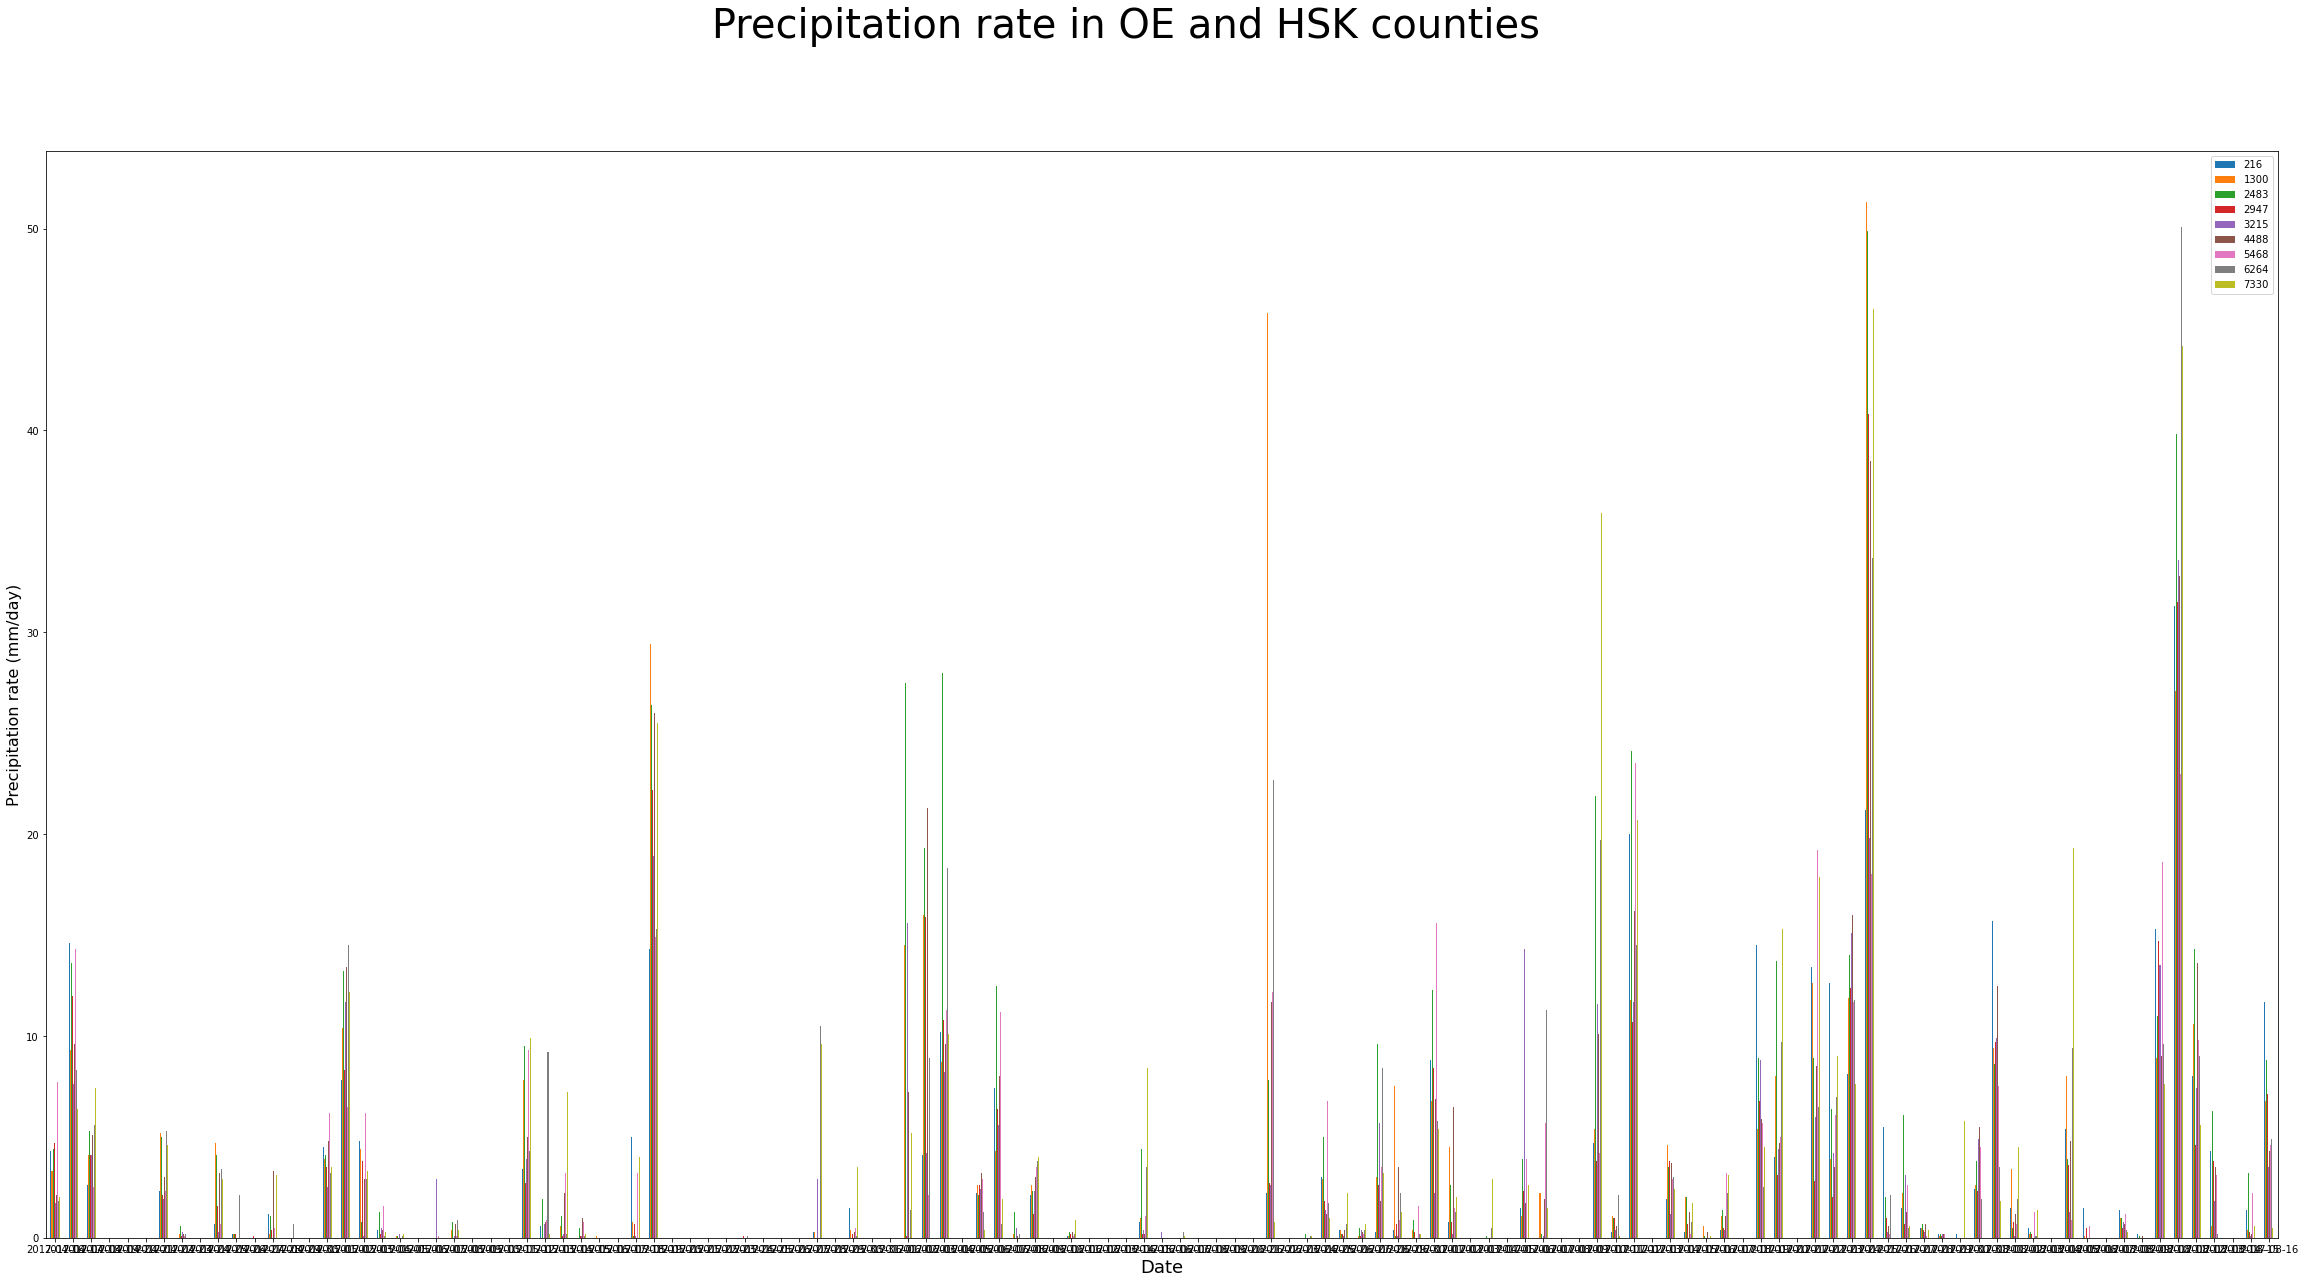

In [19]:
#Plotting a line graph for daily precipitationn from April to August

plt.rcParams["figure.figsize"] = (40,20)
ax = df_final.plot.bar(rot=0)
ax.figure.suptitle('Precipitation rate in OE and HSK counties', fontsize=40)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation rate (mm/day)', fontsize=16)
plt.savefig('Main.jpg')

In [20]:
# Since dates are unclear in previous bar graph, creating data frames to plot daily precipitation rate
# for roughly a month each
end_date = pd.to_datetime("2017-05-16")
df_april_may = df_final[df_final.index <= end_date]


start_date = pd.to_datetime("2017-05-17")
end_date = pd.to_datetime("2017-06-16")
df_may_june = df_final[df_final.index >= start_date] 
df_may_june = df_may_june[df_may_june.index <= end_date]


start_date = pd.to_datetime("2017-06-17")
end_date = pd.to_datetime("2017-07-16")
df_june_july = df_final[df_final.index >= start_date] 
df_june_july = df_june_july[df_june_july.index <= end_date]


start_date = pd.to_datetime("2017-07-17")

df_july_august = df_final[df_final.index >= start_date]

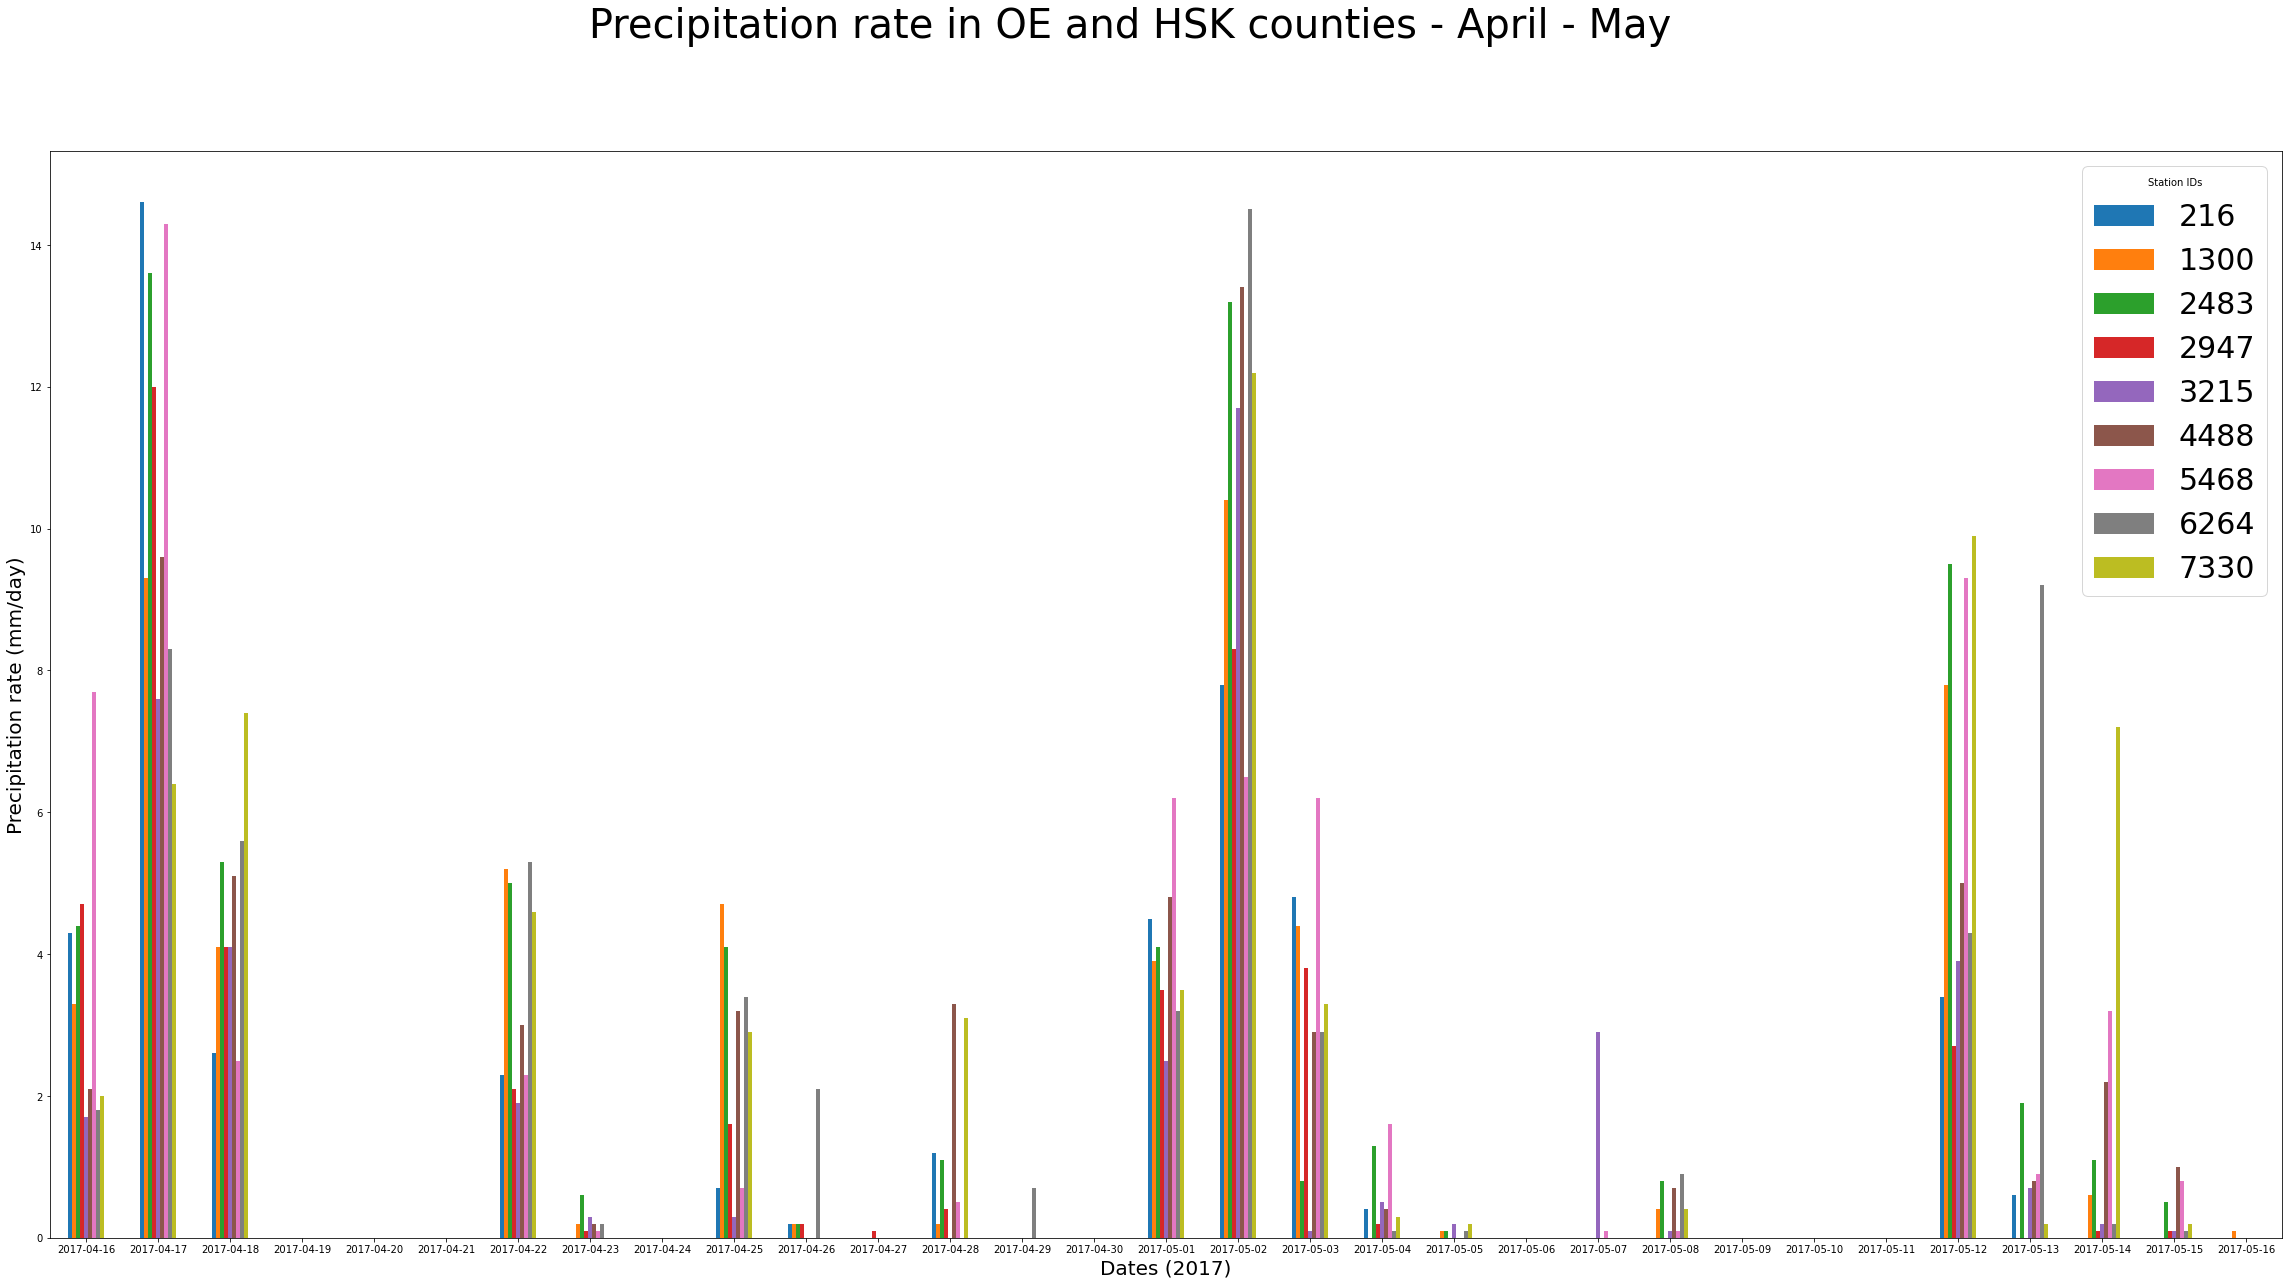

In [21]:
#Bar graph for 2017-04-16 to 2017-05-16

df_april_may.plot.bar(rot=0)
plt.suptitle('Precipitation rate in OE and HSK counties - April - May', fontsize=40)
plt.xlabel('Dates (2017)', fontsize=20)
plt.ylabel('Precipitation rate (mm/day)', fontsize=20)
plt.legend(title = "Station IDs", fancybox=True,  fontsize = 30)
plt.savefig('April_May.jpg')

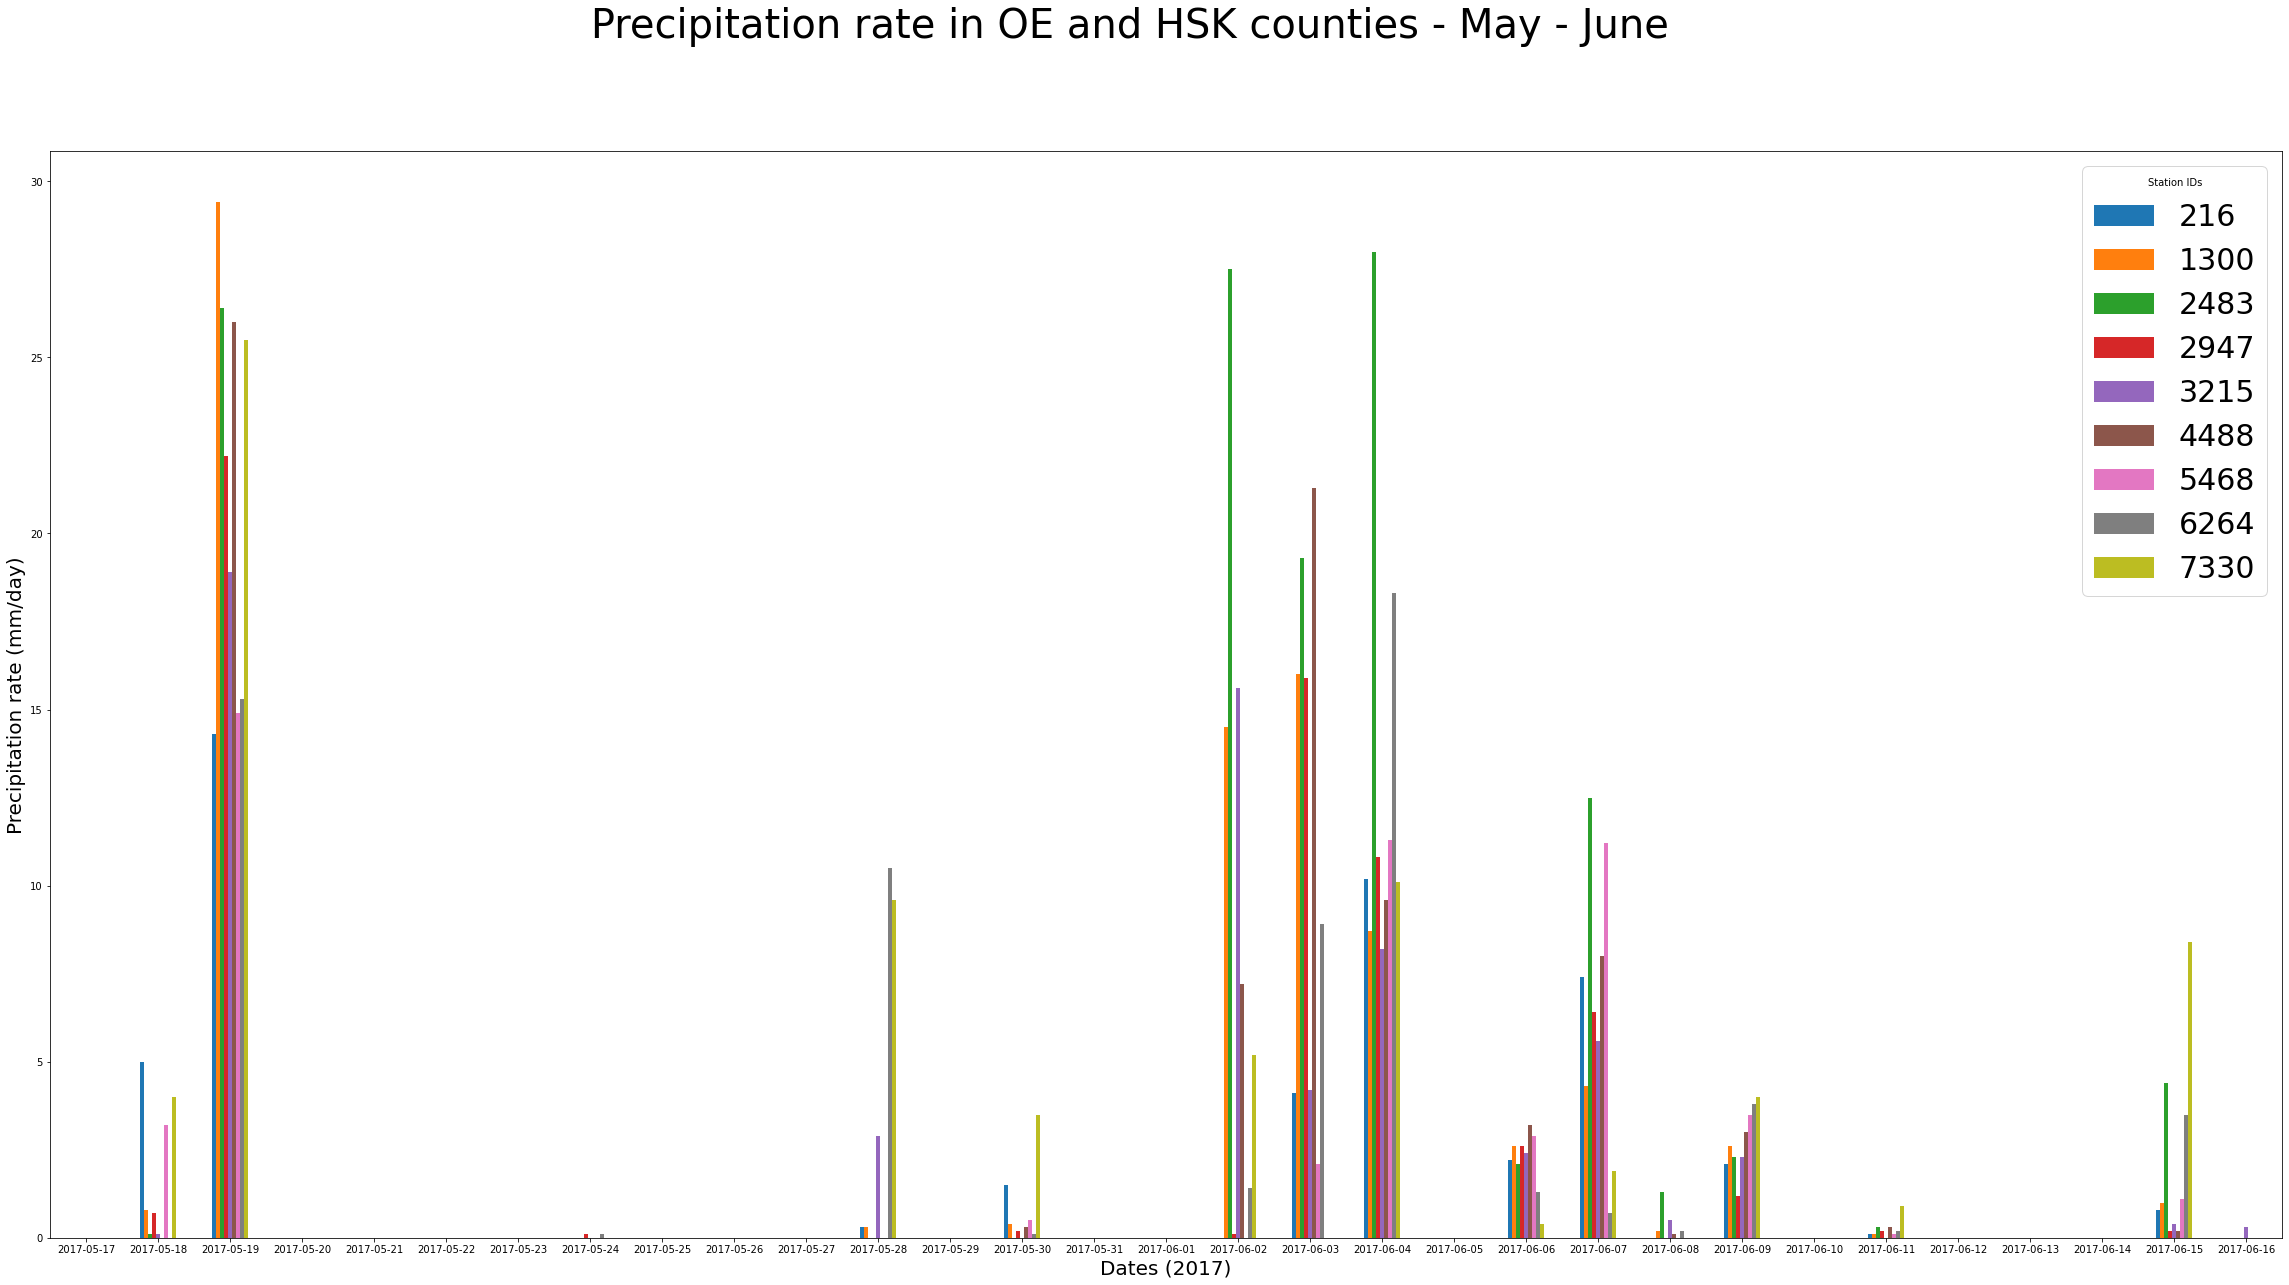

In [22]:
#Bar graph for 2017-05-17 to 2017-06-16

df_may_june.plot.bar(rot=0)
plt.suptitle('Precipitation rate in OE and HSK counties - May - June', fontsize=40)
plt.xlabel('Dates (2017)', fontsize=20)
plt.ylabel('Precipitation rate (mm/day)', fontsize=20)
plt.legend(title = "Station IDs", fancybox=True,  fontsize = 30)
plt.savefig('May_June.jpg')

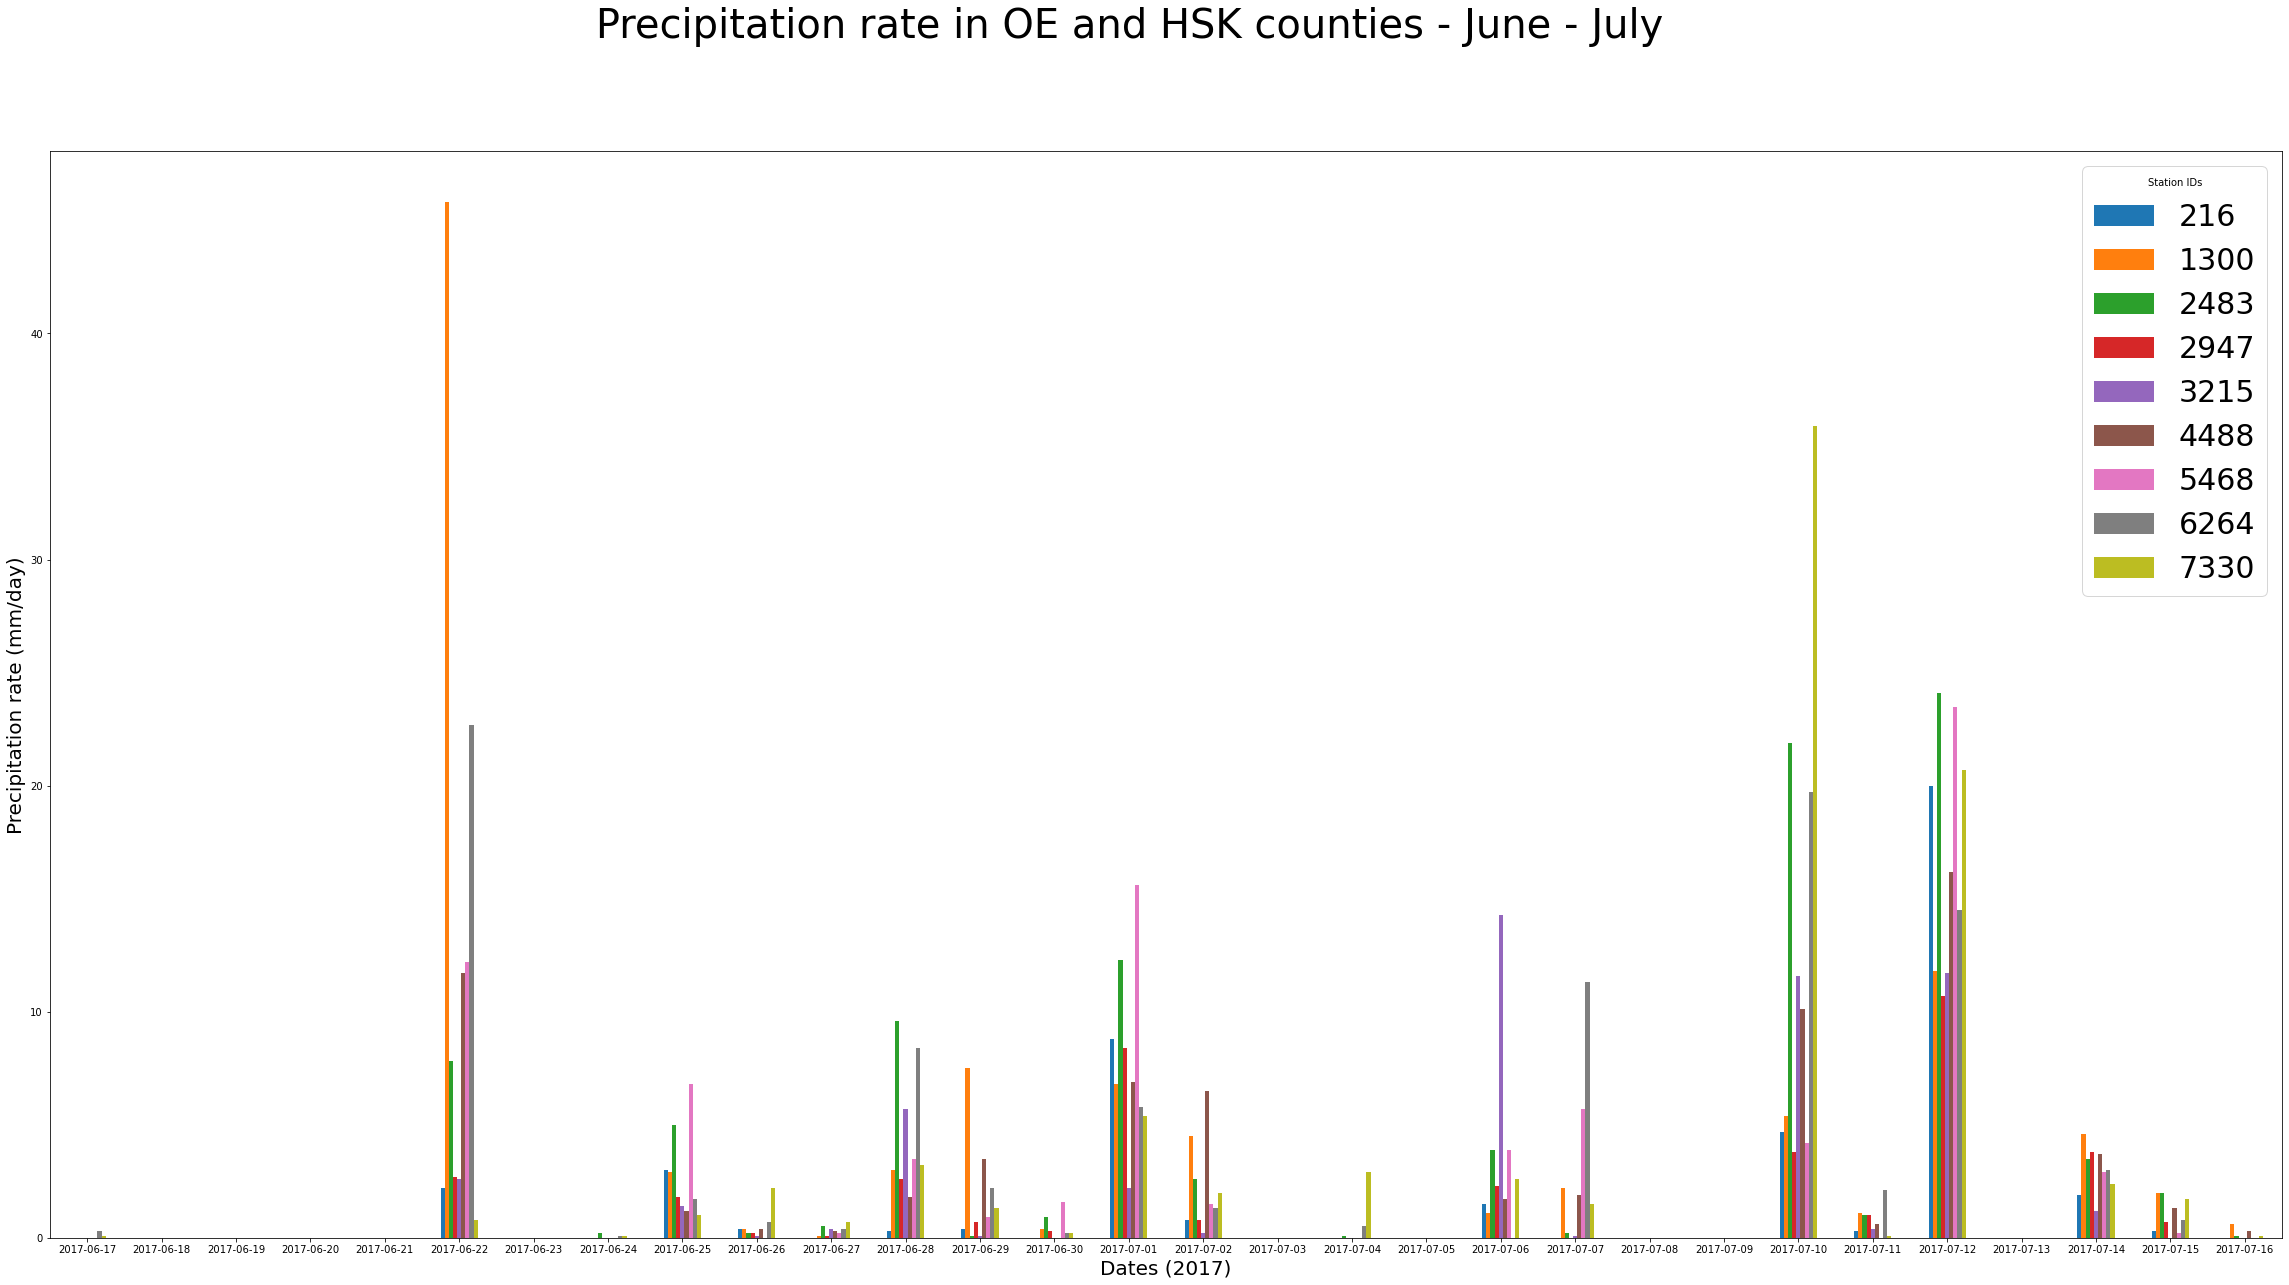

In [23]:
#Bar graph for 2017-06-17 to 2017-07-16

df_june_july.plot.bar(rot=0)
plt.suptitle('Precipitation rate in OE and HSK counties - June - July', fontsize=40)
plt.xlabel('Dates (2017)', fontsize=20)
plt.ylabel('Precipitation rate (mm/day)', fontsize=20)
plt.legend(title = "Station IDs", fancybox=True,  fontsize = 30)
plt.savefig('June_July.jpg')

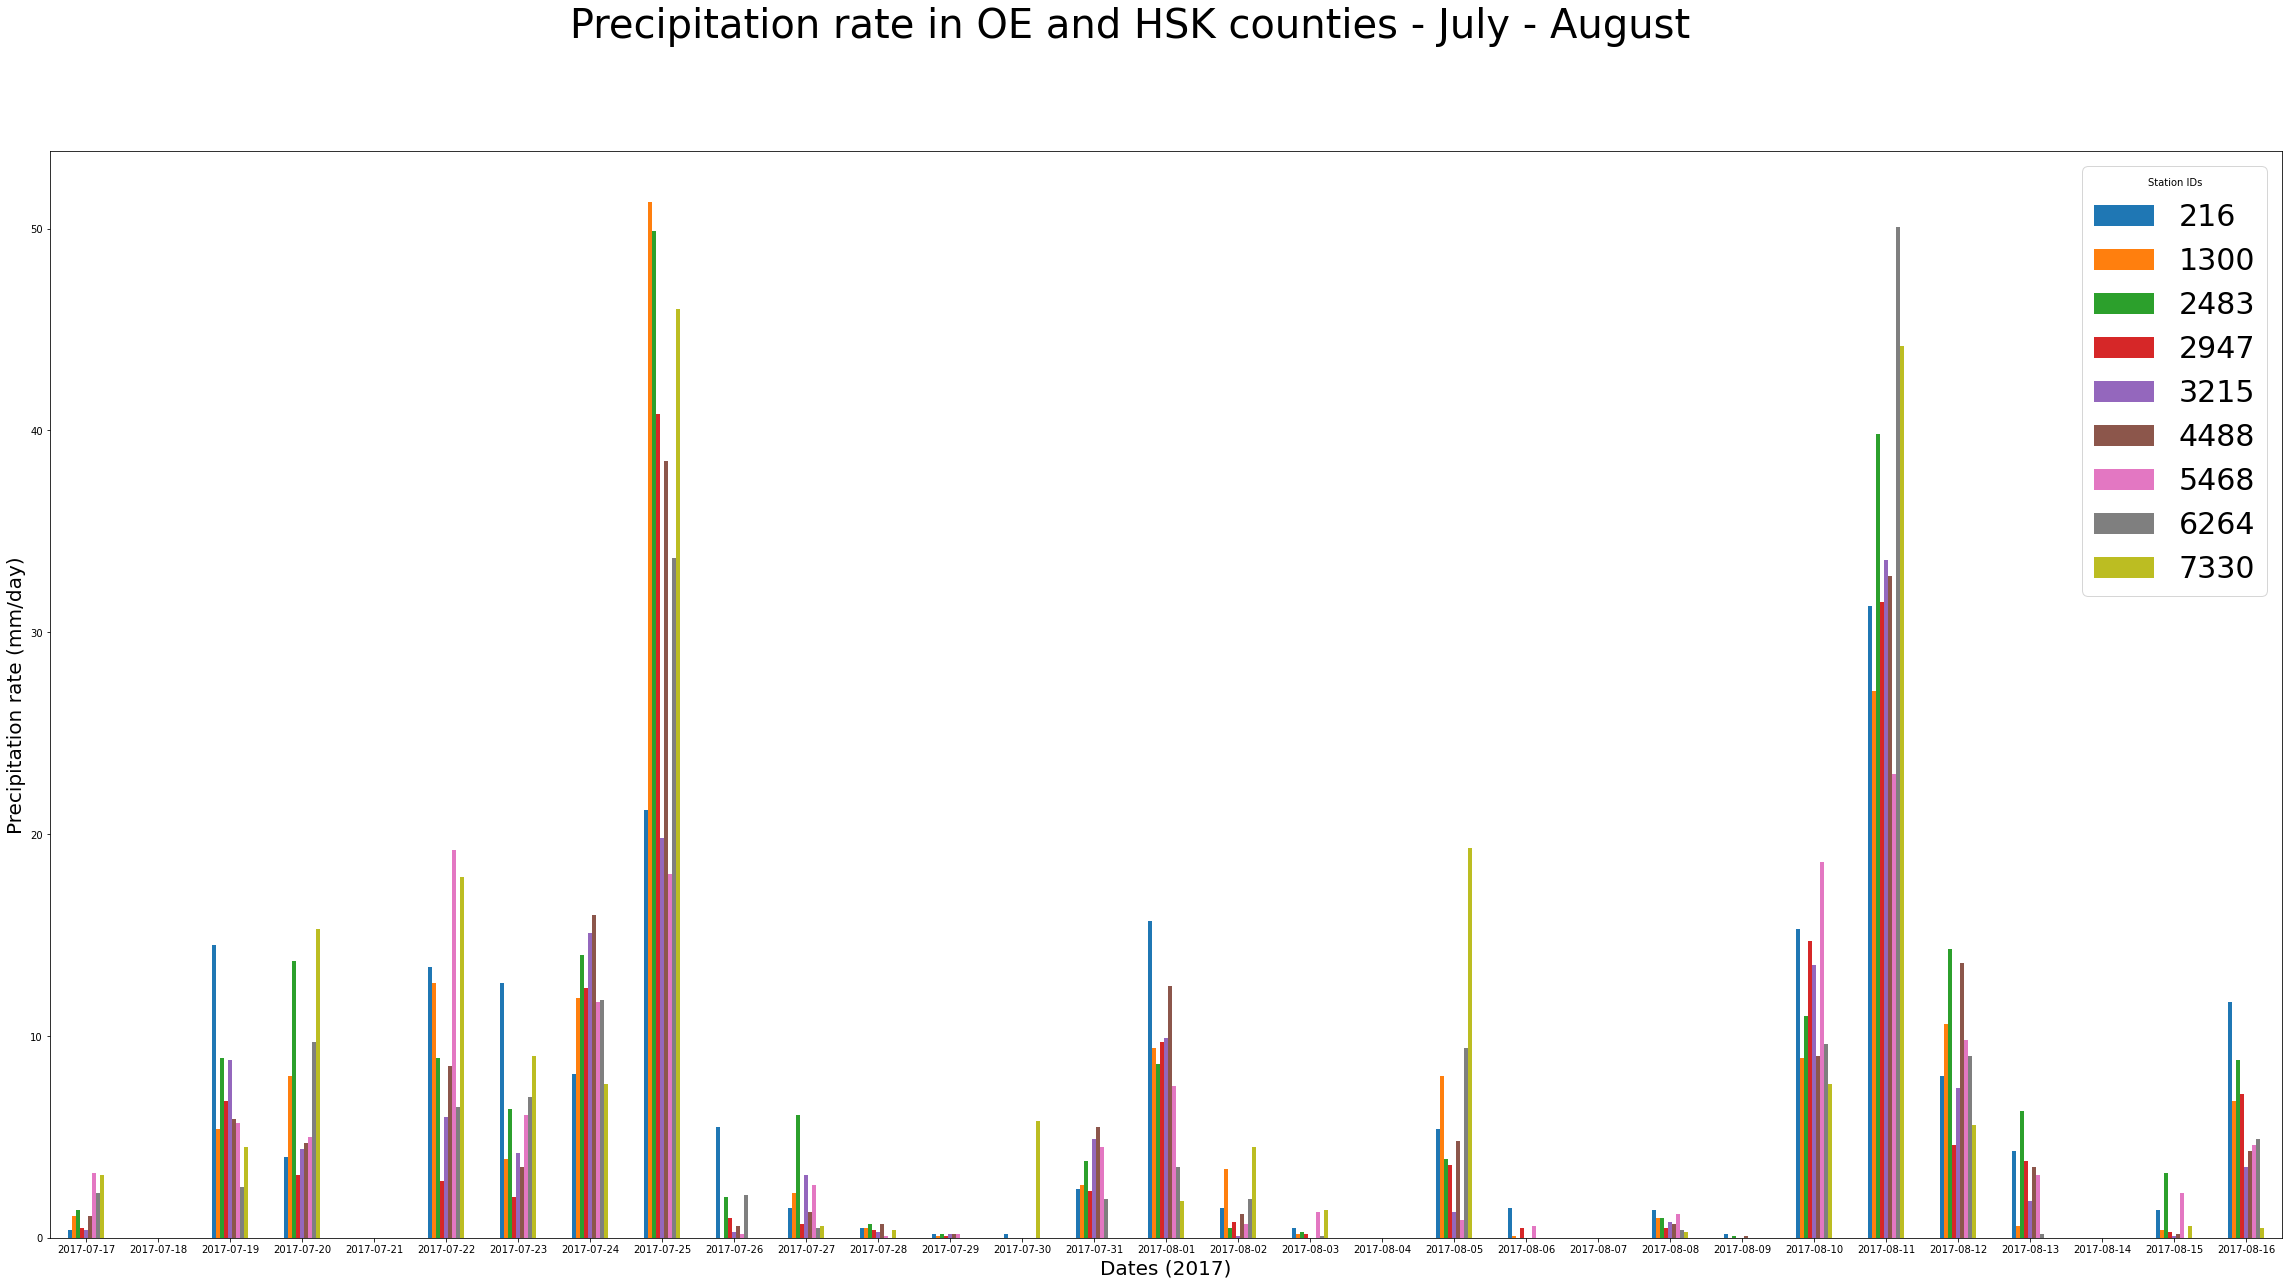

In [24]:
#Bar graph for 2017-07-17 to 2017-08-16

df_july_august.plot.bar(rot=0)
plt.suptitle('Precipitation rate in OE and HSK counties - July - August', fontsize=40)
plt.xlabel('Dates (2017)', fontsize=20)
plt.ylabel('Precipitation rate (mm/day)', fontsize=20)
plt.legend(title = "Station IDs", fancybox=True,  fontsize = 30)
plt.savefig('July_August.jpg')

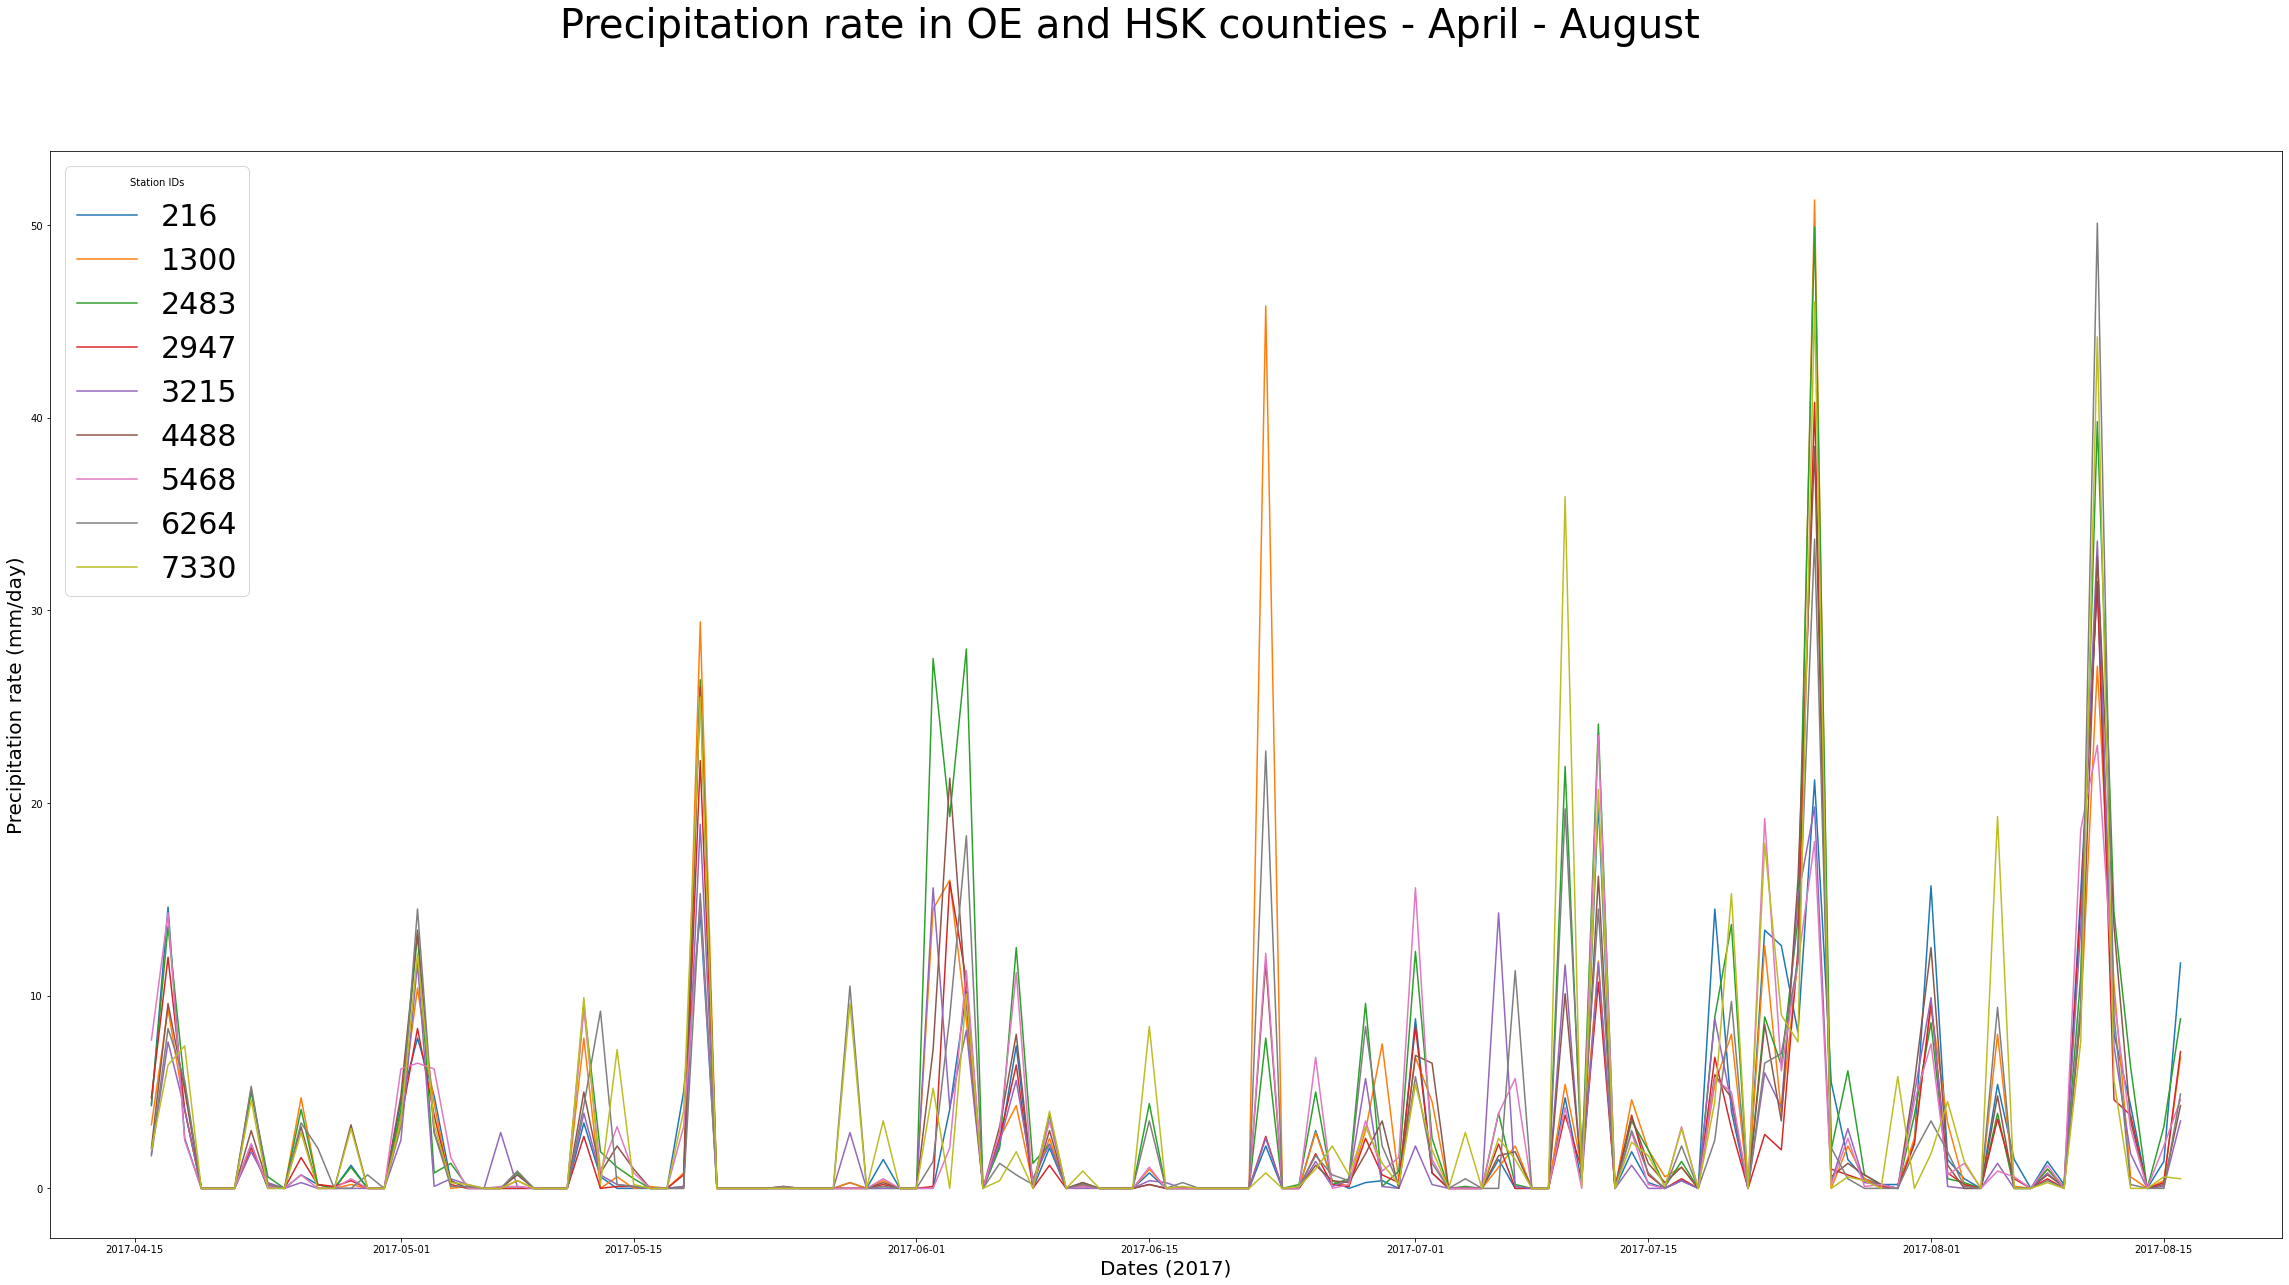

In [27]:
#Plotting a line graph for daily precipitationn from April to August

df_final.plot.line()
plt.legend(title = "Station IDs", fancybox=True, loc=2,  fontsize = 30)
plt.suptitle('Precipitation rate in OE and HSK counties - April - August', fontsize=40)
plt.xlabel('Dates (2017)', fontsize=20)
plt.ylabel('Precipitation rate (mm/day)', fontsize=20)
plt.savefig('Line_graph.jpg')